# Pothole Detection Using Transfer Learning & CNN
## Binary Image Classification

In [2]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [42]:
base_dir = r"/home/admin/Desktop/Pot-Hole-Detection/Data"

In [5]:
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

In [6]:
train_plain_dir = os.path.join(train_dir,'plain')
train_pothole_dir = os.path.join(train_dir,'pothole')

In [7]:
test_plain_dir = os.path.join(test_dir,'plain')
test_pothole_dir = os.path.join(test_dir,'pothole')

In [8]:
validation_plain_dir = os.path.join(validation_dir,'plain')
validation_pothole_dir = os.path.join(validation_dir,'pothole')

In [9]:
# Sanity checks
print('total training plain images :', len(os.listdir(train_plain_dir)))
print('total training pothole images : ',len(os.listdir(train_pothole_dir)))
print('total validation plain images :', len(os.listdir(validation_plain_dir)))
print('total validation pothole images :', len(os.listdir(validation_pothole_dir)))
print('total test plain images :', len(os.listdir(test_plain_dir)))
print('total test pothole images :', len(os.listdir(test_pothole_dir)))

total training plain images : 210
total training pothole images :  211
total validation plain images : 70
total validation pothole images : 70
total test plain images : 70
total test pothole images : 70


In [10]:
train_size, validation_size, test_size = 420,140,140
img_width, img_height = 224, 224

6.jpg


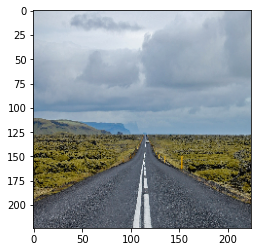

154.031419-potholes-02.jpg


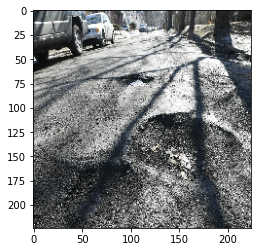

4.jpg


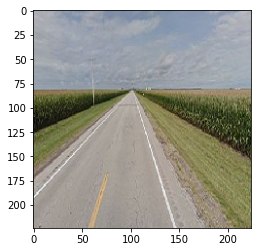

146.poster_536d15e281c949fe9d3b3e2573dd3260.jpg


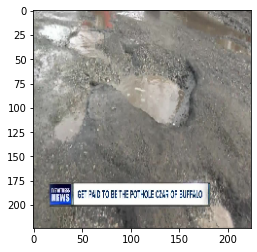

In [11]:
def show_pictures(path):
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)
    print(random_img)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(img_tensor)
    plt.show()
    
for i in range(0,2):
    show_pictures(train_plain_dir)
    show_pictures(train_pothole_dir)

In [12]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

58892288/58889256 [==============================] - 17s 0us/step


In [13]:
# Check architecture
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 420 images belonging to 2 classes.


/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Found 140 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [15]:
# Debug
print(train_features)
print(train_labels)

[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.00713575e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.96506429e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.35918295e-01 0.00000000e+00]
   ...
   [4.59675789e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.28446043e-01 0.00000000e+00]
   [1.18596330e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.33107638e-01 0.00000000e+00]
   [1.60572201e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.89145148e-01 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.14356017e+00 0.00000000e+00]
   [7.40497485e-02 0.00000000e+00 3.03501487e-02 ... 0.00000000e+00
    1.13891387e+00 0.00000000e+00]
   [1.48455486e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    9.15869236e-01 0.00000000e+00]
   ...
   [2.00042292e-01 0.00000000e+00 0.00000000e+00 ... 0.00

In [16]:
train_features.shape

(420, 7, 7, 512)

# Modeling

In [17]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [19]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
14/14 [==============================] - 3s 202ms/step - loss: 2.0873 - acc: 0.6290 - val_loss: 0.2019 - val_acc: 0.9286
Epoch 2/100
14/14 [==============================] - 1s 64ms/step - loss: 0.2840 - acc: 0.9101 - val_loss: 0.1588 - val_acc: 0.9500
Epoch 3/100
14/14 [==============================] - 2s 159ms/step - loss: 0.0864 - acc: 0.9679 - val_loss: 0.1324 - val_acc: 0.9571
Epoch 4/100
14/14 [==============================] - 2s 120ms/step - loss: 0.0439 - acc: 0.9872 - val_loss: 0.1575 - val_acc: 0.9643
Epoch 5/100
14/14 [==============================] - 1s 38ms/step - loss: 0.0405 - acc: 0.9862 - val_loss: 0.1210 - val_acc: 0.9643
Epoch 6/100
14/14 [==============================] - 1s 41ms/step - loss: 0.0601 - acc: 0.9655 - val_loss: 0.1417 - val_acc: 0.9714
Epoch 7/100
14/14 [==============================] - 1s 41ms/step - loss: 0.0187 - acc: 0.9969 - val_loss: 0.1119 - val_acc: 0.9714
Epoch 8/100
14/14 [==============================] - 1s 38ms/step - loss:

Epoch 62/100
14/14 [==============================] - 1s 38ms/step - loss: 7.7900e-04 - acc: 1.0000 - val_loss: 0.1712 - val_acc: 0.9714
Epoch 63/100
14/14 [==============================] - 1s 37ms/step - loss: 3.3366e-04 - acc: 1.0000 - val_loss: 0.1682 - val_acc: 0.9714
Epoch 64/100
14/14 [==============================] - 1s 111ms/step - loss: 2.9516e-04 - acc: 1.0000 - val_loss: 0.1670 - val_acc: 0.9643
Epoch 65/100
14/14 [==============================] - 2s 157ms/step - loss: 2.2684e-04 - acc: 1.0000 - val_loss: 0.1627 - val_acc: 0.9643
Epoch 66/100
14/14 [==============================] - 1s 97ms/step - loss: 8.4559e-04 - acc: 1.0000 - val_loss: 0.1749 - val_acc: 0.9714
Epoch 67/100
14/14 [==============================] - 1s 37ms/step - loss: 3.6247e-04 - acc: 1.0000 - val_loss: 0.1788 - val_acc: 0.9714
Epoch 68/100
14/14 [==============================] - 1s 37ms/step - loss: 1.3949e-04 - acc: 1.0000 - val_loss: 0.1768 - val_acc: 0.9714
Epoch 69/100
14/14 [===================

In [20]:
# Save model
model.save('pothole_fcl.h5')

# Model evaluation

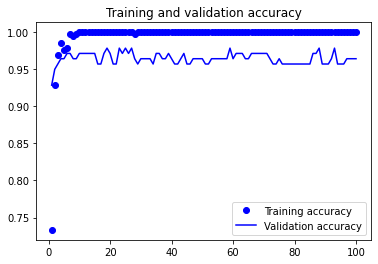

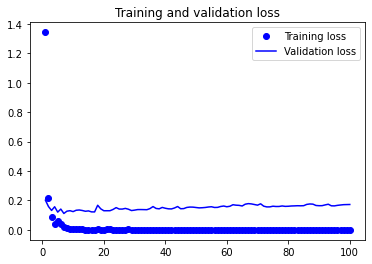

In [21]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model in action

In [22]:
# Define function to visualize predictions
def visualize_predictions(classifier, n_cases):
    for i in range(0,n_cases):
        path = random.choice([test_plain_dir, test_pothole_dir])

        # Get picture
        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Make prediction
        try:
            prediction = classifier.predict(features)
        except:
            prediction = classifier.predict(features.reshape(1, 7*7*512))

        # Show picture
        plt.imshow(img_tensor)
        plt.show()

        # Write prediction
        if prediction < 0.5:
            print('Plain')
        else:
            print('Pothole')

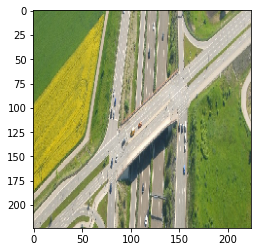

Plain


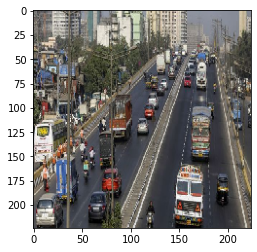

Plain


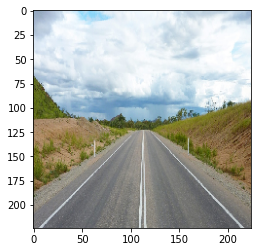

Plain


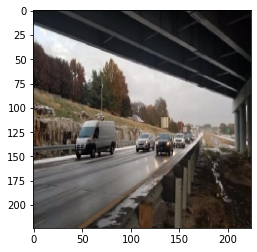

Plain


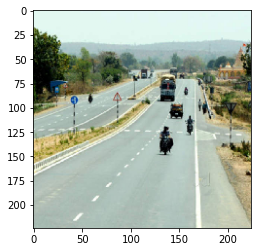

Plain


In [23]:
# Visualize predictions
visualize_predictions(model, 5)

# GLOBAL AVG POOLING

In [24]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

model = models.Sequential()
model.add(layers.GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [26]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
14/14 [==============================] - 1s 22ms/step - loss: 0.7848 - acc: 0.4639 - val_loss: 0.6424 - val_acc: 0.6357
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6327 - acc: 0.6893 - val_loss: 0.6068 - val_acc: 0.8286
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.6043 - acc: 0.8196 - val_loss: 0.5794 - val_acc: 0.8786
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 0.5703 - acc: 0.8946 - val_loss: 0.5528 - val_acc: 0.9071
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.5359 - acc: 0.9138 - val_loss: 0.5295 - val_acc: 0.9071
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5118 - acc: 0.8995 - val_loss: 0.5082 - val_acc: 0.9000
Epoch 7/100
14/14 [==============================] - ETA: 0s - loss: 0.4888 - acc: 0.906 - 0s 9ms/step - loss: 0.4889 - acc: 0.9217 - val_loss: 0.4879 - val_acc: 0.9143
Epoch 8/100
14/14 [=====================

14/14 [==============================] - 0s 13ms/step - loss: 0.1543 - acc: 0.9531 - val_loss: 0.2124 - val_acc: 0.9429
Epoch 63/100
14/14 [==============================] - 0s 9ms/step - loss: 0.1537 - acc: 0.9641 - val_loss: 0.2135 - val_acc: 0.9357
Epoch 64/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1350 - acc: 0.9662 - val_loss: 0.2153 - val_acc: 0.9214
Epoch 65/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1501 - acc: 0.9563 - val_loss: 0.2111 - val_acc: 0.9357
Epoch 66/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1439 - acc: 0.9641 - val_loss: 0.2085 - val_acc: 0.9357
Epoch 67/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1343 - acc: 0.9736 - val_loss: 0.2079 - val_acc: 0.9357
Epoch 68/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1445 - acc: 0.9620 - val_loss: 0.2078 - val_acc: 0.9357
Epoch 69/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1375 - acc: 

In [27]:
# Save model
model.save('pothole_gap.h5')

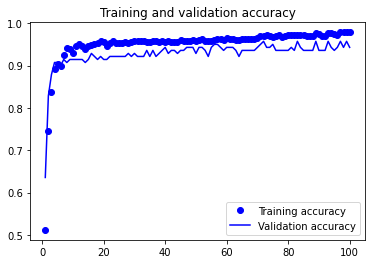

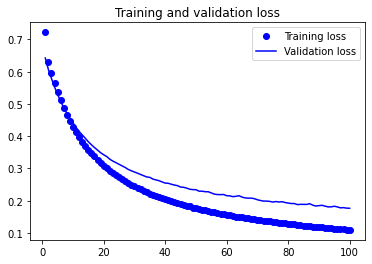

In [28]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

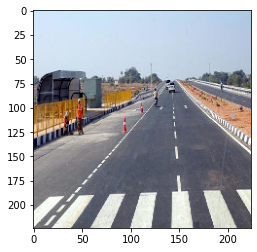

Plain


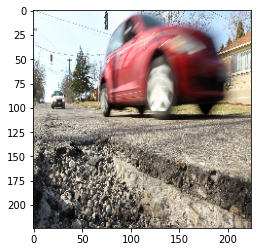

Pothole


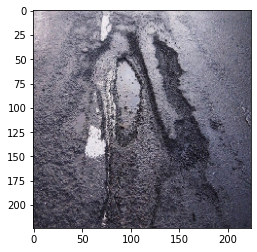

Pothole


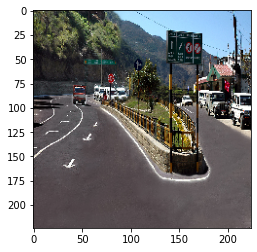

Plain


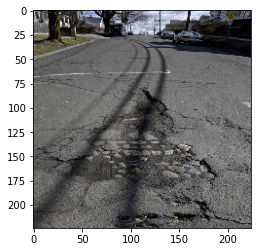

Pothole


In [29]:
# Visualize predictions
visualize_predictions(model, 5)

# Linear support vector machine

In [30]:
# Concatenate training and validation sets
svm_features = np.concatenate((train_features, validation_features))
svm_labels = np.concatenate((train_labels, validation_labels))

In [31]:
svm_labels

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0.

In [32]:
svm_features.shape

(560, 7, 7, 512)

In [33]:
# Build model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

X_train, y_train = svm_features.reshape(560,7*7*512), svm_labels

param = [{
          "C": [0.01, 0.1, 1, 10, 100]
         }]
 
svm = LinearSVC(penalty='l2', loss='squared_hinge',max_iter=10000)  # As in Tang (2013)
clf = GridSearchCV(svm, param, cv=10,verbose=10)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10; 1/5] START C=0.01.....................................................
[CV 1/10; 1/5] END ...................................C=0.01; total time=   3.7s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   5.9s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END .............................

GridSearchCV(cv=10, estimator=LinearSVC(max_iter=10000),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}], verbose=10)

In [34]:
print("OVER!!!")

OVER!!!


In [35]:
# Save model
model.save('pothole_svm.h5')

In [36]:
clf

GridSearchCV(cv=10, estimator=LinearSVC(max_iter=10000),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}], verbose=10)

In [37]:
# Evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print("\nAccuracy score (mean):")
cvss = np.mean(cross_val_score(clf, X_train, y_train, cv=10,verbose=10))
print(cvss)

print("\nAccuracy score (standard deviation):")
asss = np.std(cross_val_score(clf, X_train, y_train, cv=10,verbose=10))
print(asss)


Accuracy score (mean):
[CV] START .....................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10; 1/5] START C=0.01.....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.1s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/10; 3/5] END ......................................C=1; total time=  52.4s
[CV 2/10; 3/5] START C=1........................................................
[CV 2/10; 3/5] END ......................................C=1; total time=   1.6s
[CV 3/10; 3/5] START C=1........................................................


/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/10; 3/5] END ......................................C=1; total time=  35.6s
[CV 4/10; 3/5] START C=1........................................................


/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/10; 3/5] END ......................................C=1; total time=  38.8s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   3.9s
[CV 6/10; 3/5] START C=1........................................................


/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 6/10; 3/5] END ......................................C=1; total time=  39.6s
[CV 7/10; 3/5] START C=1........................................................


/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 7/10; 3/5] END ......................................C=1; total time=  33.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   1.7s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   1.7s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   1.3s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.1min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.5s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.1s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.4min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.9min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.7s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   3.0s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.5s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 16.5min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   3.4s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   3.0s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.2s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   3.6s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 20.5min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.8s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.7s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/10; 3/5] END ......................................C=1; total time=  32.1s
[CV 2/10; 3/5] START C=1........................................................
[CV 2/10; 3/5] END ......................................C=1; total time=   3.4s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=  12.3s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=  21.0s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END .........

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 24.4min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.7s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.4s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/10; 3/5] END ......................................C=1; total time=  33.0s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.6s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.6s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   2.7s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=  16.1s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 28.4min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.7s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.5s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.1s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 29.7min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   3.1s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 33.4min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   3.1s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   3.2s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   3.1s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   3.5s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   4.2s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.7s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 36.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   3.4s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.7s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   3.1s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.5min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.6s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.2s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.4min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.4s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.1s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 6/10; 3/5] END ......................................C=1; total time=  32.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=  11.2s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=  13.5s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   1.6s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .........

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 15.5min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.2s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   3.2s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.7s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 6/10; 3/5] END ......................................C=1; total time=  36.1s
[CV 7/10; 3/5] START C=1........................................................


/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 7/10; 3/5] END ......................................C=1; total time=  34.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.6s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=  20.3s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   1.5s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   1.6s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   1.5s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .........

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 20.3min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.7s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 23.0min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.5s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.5s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.6s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/10; 3/5] END ......................................C=1; total time=  33.6s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   2.9s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   4.5s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 26.2min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.1s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 27.4min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   3.1s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.1s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/10; 3/5] END ......................................C=1; total time=  51.6s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   8.6s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   3.1s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   6.6s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 10/10; 3/5] END .....................................C=1; total time=  58.0s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   1.4s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   1.4s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   1.4s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   1.4s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   1.4s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 32.5min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.9s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   3.0s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/10; 3/5] END ......................................C=1; total time=  33.6s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.8s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   3.2s
[CV 8/10; 3/5] START C=1........................................................


/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 8/10; 3/5] END ......................................C=1; total time=  34.5s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   2.2s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=  24.7s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   1.7s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   1.4s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   1.4s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .........

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 38.1min finished


In [40]:
print("Accuracy score (mean) : ", cvss)
print("\nAccuracy score (standard deviation) : ", asss)

Accuracy score (mean) :  0.9696428571428571

Accuracy score (standard deviation) :  0.019642857142857125


[learning_curve] Training set sizes: [ 50 100 151 201 252 302 352 403 453 504]
[CV] START .....................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10; 1/5] START C=0.01.....................................................
[CV 1/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 2/10; 1/5] START C=0.01.....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.9s remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   46.8s remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.6s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.6s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.9s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.0s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.0s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.7min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.1s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.8s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.8s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.4min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.2s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   3.6s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.7s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   4.7s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  7.9min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.1s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.8s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/10; 3/5] END ......................................C=1; total time=  37.0s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=  31.2s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   1.2s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .........

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.5min remaining:    0.0s


[CV 1/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 2/10; 1/5] START C=0.01.....................................................
[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   3.0s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.7s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.6s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.6s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.5s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.7s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   1.4s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.4s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.4s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.8s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.1s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.9s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.1s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   1.1s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.1s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.6s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.1s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.1s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   1.4s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.6s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.6s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.6s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.9s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.4s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.9s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.8s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.6s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.5s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   1.7s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.2s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   3.3s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   3.1s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   3.2s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.1s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.2s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.3s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.4s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.5s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.7s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.9s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   0.8s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   0.9s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   0.9s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.0s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   1.9s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.5s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.1s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   1.5s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.1s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.5s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.3s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   1.6s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

[CV 2/10; 1/5] END ...................................C=0.01; total time=   2.4s
[CV 3/10; 1/5] START C=0.01.....................................................
[CV 3/10; 1/5] END ...................................C=0.01; total time=   1.2s
[CV 4/10; 1/5] START C=0.01.....................................................
[CV 4/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 5/10; 1/5] START C=0.01.....................................................
[CV 5/10; 1/5] END ...................................C=0.01; total time=   2.6s
[CV 6/10; 1/5] START C=0.01.....................................................
[CV 6/10; 1/5] END ...................................C=0.01; total time=   2.8s
[CV 7/10; 1/5] START C=0.01.....................................................
[CV 7/10; 1/5] END ...................................C=0.01; total time=   2.0s
[CV 8/10; 1/5] START C=0.01.....................................................
[CV 8/10; 1/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/10; 3/5] END ......................................C=1; total time=  32.6s
[CV 2/10; 3/5] START C=1........................................................
[CV 2/10; 3/5] END ......................................C=1; total time=  10.1s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.7s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=  23.5s
[CV 6/10; 3/5] START C=1........................................................


/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 6/10; 3/5] END ......................................C=1; total time=  31.0s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.8s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=  21.8s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   1.5s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   1.5s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .........

[CV 7/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   0.1s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.1s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.1s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .........

[CV 7/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.2s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   0.4s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.3s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.3s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .........

[CV 7/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   0.4s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.4s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.4s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .........

[CV 7/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   0.6s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.5s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.5s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .........

[CV 7/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.8s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   0.7s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.7s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .........

[CV 7/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   0.9s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .........

[CV 7/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   0.9s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.9s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/10; 3/5] END ......................................C=1; total time=  43.7s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   2.4s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=  24.0s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   2.5s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/10; 3/5] END ......................................C=1; total time=  50.6s
[CV 2/10; 3/5] START C=1........................................................
[CV 2/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   3.8s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END .........

[CV 1/10; 3/5] END ......................................C=1; total time=   1.6s
[CV 2/10; 3/5] START C=1........................................................
[CV 2/10; 3/5] END ......................................C=1; total time=   1.9s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=  10.1s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=  29.6s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.7s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 10/10; 3/5] END .....................................C=1; total time=  47.5s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   1.7s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   2.0s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   1.6s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   4.9s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   1.1s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

[CV 10/10; 3/5] END .....................................C=1; total time=   0.1s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.1s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.1s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   0.1s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   0.1s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   0.1s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

[CV 10/10; 3/5] END .....................................C=1; total time=   0.4s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.4s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.3s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   1.0s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   0.3s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

[CV 10/10; 3/5] END .....................................C=1; total time=   0.4s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.4s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.4s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   0.4s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   0.5s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   0.4s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

[CV 10/10; 3/5] END .....................................C=1; total time=   0.5s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.5s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.5s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   0.6s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   0.5s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   0.5s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

[CV 10/10; 3/5] END .....................................C=1; total time=   0.8s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.7s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.7s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   1.9s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

[CV 10/10; 3/5] END .....................................C=1; total time=   0.7s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.7s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   0.7s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   0.7s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   0.7s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

[CV 10/10; 3/5] END .....................................C=1; total time=   0.9s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   1.0s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   0.8s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 6/10; 3/5] END ......................................C=1; total time=  49.9s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=  12.9s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.9s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END .....................................C=1; total time=   1.2s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   1.0s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/10; 3/5] END ......................................C=1; total time=  27.8s
[CV 2/10; 3/5] START C=1........................................................
[CV 2/10; 3/5] END ......................................C=1; total time=  17.4s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   4.6s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END .........

[CV 1/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 2/10; 3/5] START C=1........................................................
[CV 2/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.8s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.9s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   2.2s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.7s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   2.4s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=  10.3s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   9.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   7.7s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/10; 3/5] END ......................................C=1; total time=  34.0s
[CV 2/10; 3/5] START C=1........................................................
[CV 2/10; 3/5] END ......................................C=1; total time=   5.8s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.8s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   4.9s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   2.3s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   3.2s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END .........

[CV 1/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 2/10; 3/5] START C=1........................................................
[CV 2/10; 3/5] END ......................................C=1; total time=  20.3s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   2.2s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   2.8s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   2.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.7s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   2.5s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.7s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 2/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 3/10; 3/5] START C=1........................................................
[CV 3/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   3.1s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   7.3s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   8.8s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   7.1s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   4.5s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   1.6s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.8s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   7.0s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   3.1s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   2.4s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=  21.0s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=  26.2s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 3/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 4/10; 3/5] START C=1........................................................
[CV 4/10; 3/5] END ......................................C=1; total time=   1.8s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=  26.7s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=  12.2s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END .........

[CV 4/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.2s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.1s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

[CV 4/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.2s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.3s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

[CV 4/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.4s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

[CV 4/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.5s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

[CV 4/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   0.6s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.7s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

[CV 4/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.8s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

[CV 4/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

[CV 4/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.1s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   0.9s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/10; 3/5] END ......................................C=1; total time=  31.2s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   9.8s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   7.1s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.0s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   1.3s
[CV 10/10; 3/5] START C=1.......................................................
[CV 10/10; 3/5] END ........

[CV 4/10; 3/5] END ......................................C=1; total time=  17.8s
[CV 5/10; 3/5] START C=1........................................................
[CV 5/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 6/10; 3/5] START C=1........................................................
[CV 6/10; 3/5] END ......................................C=1; total time=   1.2s
[CV 7/10; 3/5] START C=1........................................................
[CV 7/10; 3/5] END ......................................C=1; total time=   1.8s
[CV 8/10; 3/5] START C=1........................................................
[CV 8/10; 3/5] END ......................................C=1; total time=   1.5s
[CV 9/10; 3/5] START C=1........................................................
[CV 9/10; 3/5] END ......................................C=1; total time=   1.4s
[CV 10/10; 3/5] START C=1.......................................................


/home/admin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 10/10; 3/5] END .....................................C=1; total time=  31.6s
[CV 1/10; 4/5] START C=10.......................................................
[CV 1/10; 4/5] END .....................................C=10; total time=   1.5s
[CV 2/10; 4/5] START C=10.......................................................
[CV 2/10; 4/5] END .....................................C=10; total time=   1.5s
[CV 3/10; 4/5] START C=10.......................................................
[CV 3/10; 4/5] END .....................................C=10; total time=   1.4s
[CV 4/10; 4/5] START C=10.......................................................
[CV 4/10; 4/5] END .....................................C=10; total time=   1.6s
[CV 5/10; 4/5] START C=10.......................................................
[CV 5/10; 4/5] END .....................................C=10; total time=   1.5s
[CV 6/10; 4/5] START C=10.......................................................
[CV 6/10; 4/5] END .........

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 136.8min finished


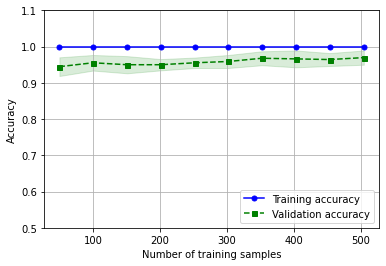

In [41]:
# Plot learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = clf,
                                                        X = X_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1,1.0,10),
                                                        cv = 10,verbose=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', 
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')


plt.plot(train_sizes, test_mean, color='green', linestyle='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.1])
plt.show()

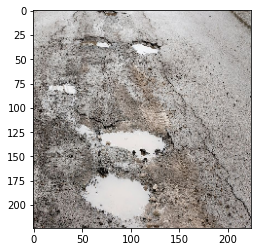

Pothole


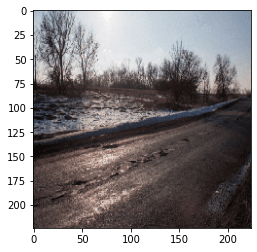

Plain


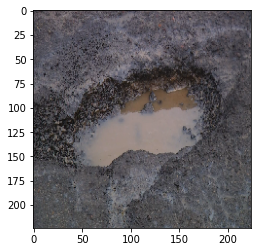

Pothole


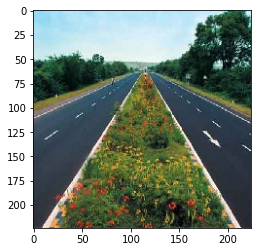

Plain


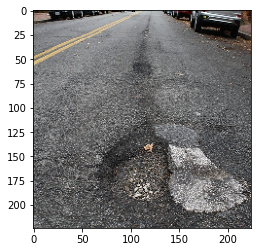

Pothole


In [44]:
# Visualize predictions
visualize_predictions(clf, 5)